# Introduction

This notebook is a supplementary material for the Introduction Chapter of the [Hands-On Generative AI with Transformers and Diffusion Models book](https://learning.oreilly.com/library/view/hands-on-generative-ai/9781098149239/).

In [1]:
import diffusers
import huggingface_hub
import transformers

diffusers.logging.set_verbosity_error()
huggingface_hub.logging.set_verbosity_error()
transformers.logging.set_verbosity_error()

## Generating Images

In [2]:
from genaibook.core import get_device

device = get_device()
print(f"Using device: {device}")

Using device: cuda


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    variant="fp16",
).to(device)

  0%|          | 0/50 [00:00<?, ?it/s]

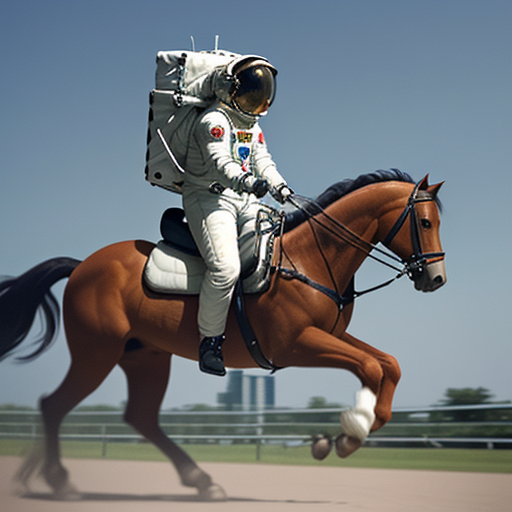

In [4]:
prompt = "a photograph of an astronaut riding a horse"
pipe(prompt).images[0]

In [ ]:
import torch
torch.manual_seed(0)

## Generating Text

In [4]:
from transformers import pipeline

classifier = pipeline("text-classification", device=device)
classifier("This movie is disgustingly good !")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998536109924316}]

In [5]:
from transformers import set_seed

# Setting the seed ensures we get the same results every time we run this code
set_seed(10)

In [10]:
generator = pipeline("text-generation")
prompt = "It was a dark and stormy"
generator(prompt)[0]["generated_text"]

'It was a dark and stormy night, it never used to be dark all the time. The sun was not on me on the first day as there were no sunsets, and I would wake up to find myself staring at the stars at night'

## Generating Sound Clips

In [ ]:
pipe = pipeline("text-to-audio", model="facebook/musicgen-small", device=device)
data = pipe("electric rock solo, very intense")

In [12]:
print(data)

{'audio': array([[[0.10799145, 0.10720303, 0.1448801 , ..., 0.00357087,
         0.00624236, 0.00949147]]], dtype=float32), 'sampling_rate': 32000}


In [14]:
import IPython.display as ipd

display(ipd.Audio(data["audio"][0], rate=data["sampling_rate"]))

: 